In [2]:
#download dataset from http://kaggle.com 
titanic_train_set_filepath = "D:/4-2/Machine Learning/Titanic_dataset/train.csv"
titanic_test_set_filepath = "D:/4-2/Machine Learning/Titanic_dataset/test.csv"

import pandas as pd
def load_titanic_data():
    return pd.read_csv(titanic_train_set_filepath), pd.read_csv(titanic_test_set_filepath)


In [3]:
train, test = load_titanic_data()

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.shape, test.shape

((891, 12), (418, 11))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

In [9]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived', 'dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

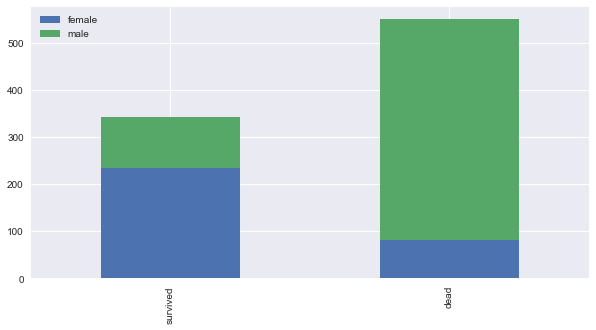

In [10]:
bar_chart('Sex')

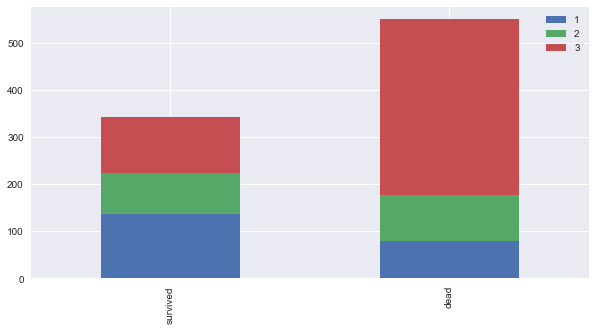

In [11]:
bar_chart('Pclass')

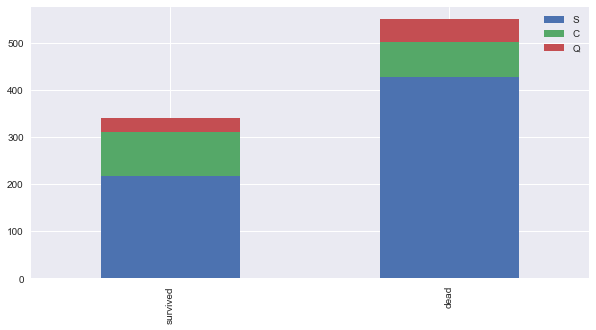

In [12]:
bar_chart('Embarked')

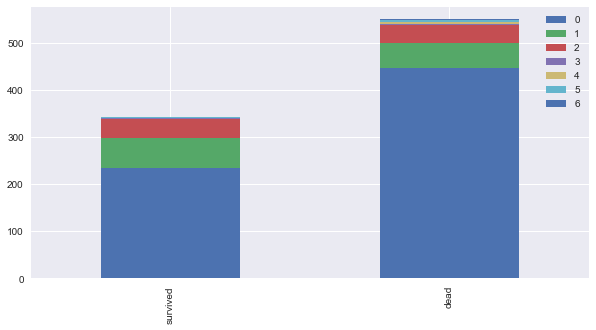

In [13]:
bar_chart('Parch')

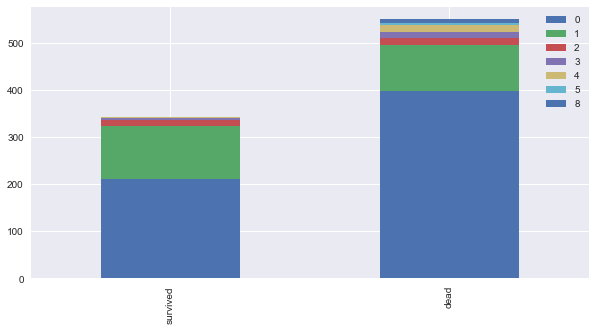

In [14]:
bar_chart('SibSp')

# feature Scaling 

In [15]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
combined = [train, test]

for set in combined:
    set['Title'] = set['Name'].str.extract( '([A-Za-z]+)\.', expand = False)

In [17]:
train[train['Survived'] == 1]['Title'].value_counts()

Miss        127
Mrs          99
Mr           81
Master       23
Dr            3
Mlle          2
Lady          1
Countess      1
Sir           1
Col           1
Ms            1
Major         1
Mme           1
Name: Title, dtype: int64

In [18]:
train[train['Survived'] == 0]['Title'].value_counts()

Mr          436
Miss         55
Mrs          26
Master       17
Rev           6
Dr            4
Col           1
Major         1
Capt          1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
#title mapping 
title_map = {"Mr":0, "Miss":1 , "Mrs":2 ,"Master":3, "Mlle":3, "Mme": 3, "Lady": 3, "Rev":3, "Dr":3 ,"Major":3, "Col":3, "Jonkheer":3, 
             "Don":3,"Dona": 3, "Mne":3, "Capt":3, "Countess":3, "Sir":3, "Ms":3}

for set in combined:
    set['Title'] = set['Title'].map(title_map)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


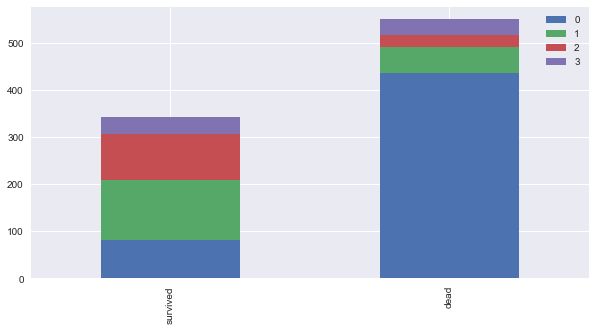

In [22]:
bar_chart('Title')

In [23]:
sex_mapping = {"male": 0, "female": 1}

for set in combined:
    set['Sex'] = set['Sex'].map(sex_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
#fill the missing age by grouping median
train['Age'].fillna(train.groupby(['Title'])['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby(['Title'])['Age'].transform('median'), inplace = True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [27]:
for set in combined:
    set.loc[(set['Age'] <= 16), 'Age'] = 0,
    set.loc[(set['Age'] > 16) & (set['Age'] <= 26), 'Age'] = 1, 
    set.loc[(set['Age'] > 26) & (set['Age'] <= 36), 'Age'] = 2,
    set.loc[(set['Age'] > 36) & (set['Age'] <= 64), 'Age'] = 3,
    set.loc[set['Age'] > 64, 'Age'] = 4

In [28]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,2


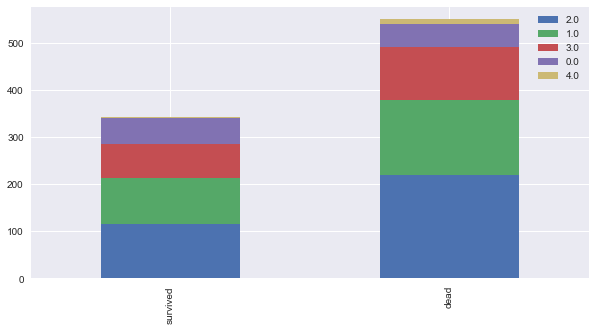

In [29]:
bar_chart('Age')

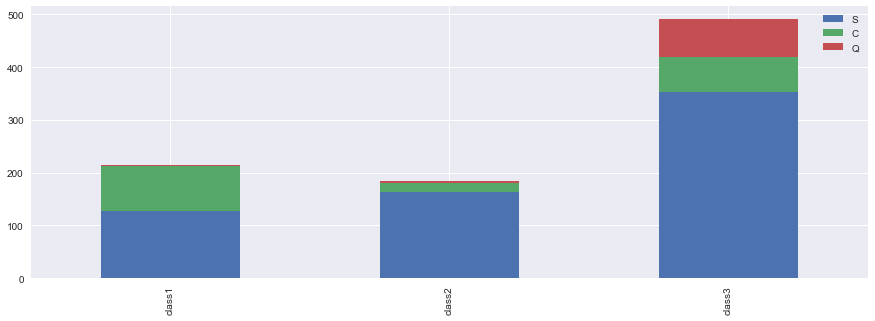

In [34]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["class1","class2","class3"]
df.plot(kind = "bar", stacked = True, figsize = (15, 5))

In [35]:
for set in combined:
    set['Embarked'] = set['Embarked'].fillna('S')

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0


In [39]:
embarked_mapping = {'S':0, 'C': 1, 'Q': 2}
for set in combined:
    set['Embarked'] = set['Embarked'].map(embarked_mapping)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0


In [45]:
for set in combined:
    set.loc[set['Fare'] <= 17, 'NFare'] = 0,
    set.loc[(set['Fare'] > 17) & (set['Fare']<= 30), 'NFare'] = 1,
    set.loc[(set['Fare'] > 30) & (set['Fare']<= 100), 'NFare'] = 2,
    set.loc[(set['Fare'] > 100), 'NFare'] = 4

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NFare
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0,0.0


In [48]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
E101           3
F2             3
D              3
E8             2
B28            2
D35            2
D26            2
C2             2
E121           2
C123           2
D20            2
B20            2
B51 B53 B55    2
C93            2
C78            2
D17            2
B22            2
B49            2
D36            2
E44            2
E67            2
C68            2
E33            2
C52            2
B35            2
              ..
C101           1
C49            1
B73            1
B50            1
C118           1
C90            1
C104           1
E36            1
E68            1
D56            1
E46            1
T              1
D48            1
E58            1
D45            1
C128           1
A6             1
C47            1
B102           1
D21            1
A10            1
D50            1
C110           1
B19            1
F38            1
B30            1
D30            1
D49           

In [50]:
for set in combined:
    set['NCabin'] = set['Cabin'].str[:1]

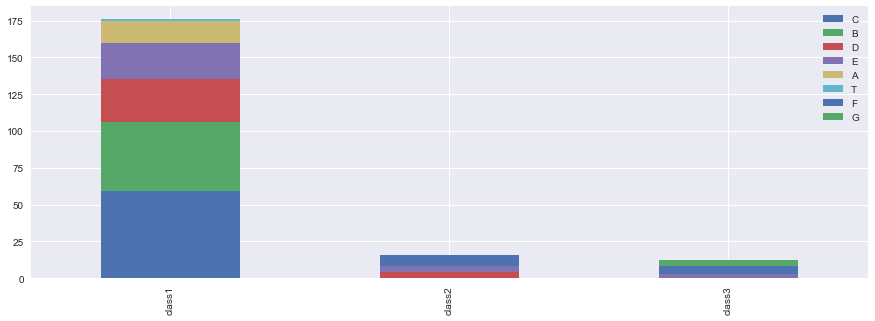

In [54]:
Pclass1 = train[train['Pclass'] == 1]['NCabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['NCabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['NCabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["class1","class2","class3"]
df.plot(kind = "bar", stacked = True, figsize = (15, 5))

In [55]:
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2.0, 'G': 2.4, 'T': 2.8}
for set in combined:
    set['NCabin'] = set['NCabin'].map(cabin_mapping)

In [59]:
#fill the missing value of cabin attribute
train['NCabin'].fillna(train.groupby('Pclass')['NCabin'].transform('median'), inplace = True)
test['NCabin'].fillna(test.groupby('Pclass')['NCabin'].transform('median'), inplace = True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NFare,NCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0,0.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2,2.0,0.8
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2,2.0,0.8
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0,0.0,2.0


In [70]:
for set in combined:
    set['Familysize'] = set['Parch'] + set['SibSp'] + 1

In [74]:
test['Familysize'].isnull().sum()

0

In [72]:
test['Familysize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Familysize, dtype: int64

In [75]:
family_map = {1:0, 2 : 0.4, 3: 0.8, 4: 1.2, 6: 1.6, 5 : 2.0, 7: 2.4, 11 : 2.8, 8 : 3.2}
for set in combined:
    set['Familysize'] = set['Familysize'].map(family_map)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NFare,NCabin,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0,0.0,2.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2,2.0,0.8,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,2.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2,2.0,0.8,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0,0.0,2.0,0.0


In [77]:
c_train = train
c_test = test

In [78]:
c_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NFare,NCabin,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0,0.0,2.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2,2.0,0.8,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0,2.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2,2.0,0.8,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0,0.0,2.0,0.0


In [79]:
c_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NFare,NCabin,Familysize
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,2,0,0.0,2.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,0,2,0.0,2.0,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,2,0,0.0,2.0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,0,0,0.0,2.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,0,2,0.0,2.0,0.8


In [80]:
combined = [c_train, c_test]
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
for set in combined:
    set.drop(features_drop, axis = 1, inplace = True)
    
c_train.drop(['PassengerId'], axis = 1, inplace = True)

In [83]:
train_data = c_train.drop(['Survived'], axis = 1)
target = c_train['Survived']

In [85]:
train_data.shape, target.shape

((891, 8), (891,))

In [86]:
train_data.head()

,Pclass,Sex,Age,Embarked,Title,NFare,NCabin,Familysize
0,3,0,1.0,0,0,0.0,2.0,0.4
1,1,1,3.0,1,2,2.0,0.8,0.4
2,3,1,1.0,0,1,0.0,2.0,0.0
3,1,1,2.0,0,2,2.0,0.8,0.4
4,3,0,2.0,0,0,0.0,2.0,0.0


# Modeling 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
NFare         891 non-null float64
NCabin        891 non-null float64
Familysize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


# Cross Validation (k-fold)

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [91]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.8        0.7752809  0.79775281 0.82022472 0.83146067 0.80898876
 0.84269663 0.80898876 0.84269663 0.84269663]


In [92]:
round(np.mean(score)* 100, 2)

81.71

In [93]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.76666667 0.84269663 0.78651685 0.7752809  0.88764045 0.75280899
 0.84269663 0.82022472 0.74157303 0.78651685]


In [94]:
round(np.mean(score)* 100, 2)

80.03

In [95]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.83333333 0.84269663 0.80898876 0.78651685 0.88764045 0.79775281
 0.82022472 0.78651685 0.7752809  0.83146067]


In [96]:
round(np.mean(score)* 100, 2)

81.7

In [97]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.84444444 0.73033708 0.76404494 0.74157303 0.70786517 0.80898876
 0.74157303 0.79775281 0.83146067 0.84269663]


In [98]:
round(np.mean(score)* 100, 2)

78.11

In [99]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [100]:
round(np.mean(score)* 100, 2)

83.5

In [103]:
c_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
NFare          417 non-null float64
NCabin         418 non-null float64
Familysize     418 non-null float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [105]:
clf = SVC()
clf.fit(train_data, target)

test_data = c_test.drop(['PassengerId'], axis = 1)

In [113]:
np.where(np.isnan(test_data))

(array([152], dtype=int64), array([5], dtype=int64))

In [119]:
np.nan_to_num(test_data)

array([[3. , 0. , 2. , ..., 0. , 2. , 0. ],
       [3. , 1. , 3. , ..., 0. , 2. , 0.4],
       [2. , 0. , 3. , ..., 0. , 2. , 0. ],
       ...,
       [3. , 0. , 3. , ..., 0. , 2. , 0. ],
       [3. , 0. , 2. , ..., 0. , 2. , 0. ],
       [3. , 0. , 0. , ..., 1. , 2. , 0.8]])

In [138]:
test_data['NFare'].fillna(test_data.groupby('Pclass')['NFare'].transform('median'), inplace = True)

In [139]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
NFare         418 non-null float64
NCabin        418 non-null float64
Familysize    418 non-null float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [140]:
prediction = clf.predict(test_data)

In [142]:
submission = pd.DataFrame({
    "PassengerId" : c_test["PassengerId"],
    "Survived" : prediction
})
submission.to_csv('submission.csv', index = False)

In [145]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [165]:
drop_attr = ['Title']
training_data = train_data.drop(drop_attr, axis = 1)

In [166]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, training_data, target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.8        0.79775281 0.79775281 0.78651685 0.85393258 0.78651685
 0.78651685 0.85393258 0.83146067 0.83146067]


In [167]:
round(np.mean(score) * 100, 2)

81.26